In [1]:
#NOTES ON OUT FILE DATA
#profiles.out used original input file data
#profiles2.out held 4.3V for 1.5min
#profiles2_detailed.out gives much more data for the above simulation
#profiles3_long.out was set to run 3 min instead of 1.5; stopped at 1.7 due to comp. time

with open('profiles2_detailed.out', 'r') as fin:
    data_list = []
    data = []
    
    # ignore the first line
    for line in fin.readlines()[1:]:
        
        line = line.rstrip('\n').rstrip(' ')
        if line == '':
            if data != []:
                data_list.append(data)
                data = []
            continue
        #print(line)
        data.append(line)
        

In [2]:
# list of appropriate variable lists for each time chunk
distance_list = []
elec_conc_list = []
sol_surf_conc_list = []
liquid_potential_list = []
solid_potential_list = []
liquid_cur_list = []
j_main_list = []
j_side1_list = []
j_side2_list = []
j_side3_list = []
time_list = []


# extract numeric data from each chunk into appropriate lists
for data in data_list :
    # extract columns
    distance = []
    elec_conc = []
    sol_surf_conc = []
    liquid_potential = []
    solid_potential = []
    liquid_cur = []
    j_main = []
    j_side1 = []
    j_side2 = []
    j_side3 = []

    # add each row's data into appropriate list
    for row in data[3:]:
        tmp = row.split(',')
        distance.append(float(tmp[0]))
        elec_conc.append(float(tmp[1]))
        sol_surf_conc.append(float(tmp[2]))
        liquid_potential.append(float(tmp[3]))
        solid_potential.append(float(tmp[4]))
        liquid_cur.append(float(tmp[5]))
        j_main.append(float(tmp[6]))
        j_side1.append(float(tmp[7]))
        j_side2.append(float(tmp[8]))
        j_side3.append(float(tmp[9]))
        
    #add each data list to its corresponding vector
    distance_list.append(distance)
    elec_conc_list.append(elec_conc)
    sol_surf_conc_list.append(sol_surf_conc)
    liquid_potential_list.append(liquid_potential)
    solid_potential_list.append(solid_potential)
    liquid_cur_list.append(liquid_cur)
    j_main_list.append(j_main)
    j_side1_list.append(j_side1)
    j_side2_list.append(j_side2)
    j_side3_list.append(j_side3)

    # extract time step and add to time list
    tmp = data[2]
    time = float(tmp.lstrip('t = ').split(' ')[0]) 
    time_list.append(time)
    


81


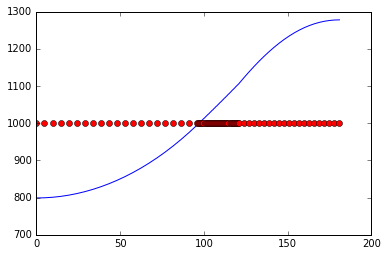

In [3]:
#demonstration of the distribution of nodes accross cell.
#Nodes in Negative elctrode, Separator, and Positive electrode are 
#set to n1=20, n2=40, n3=20 respctively.

%matplotlib inline
from matplotlib import pyplot
from numpy import ones

pyplot.plot(distance, elec_conc)
pyplot.plot(distance, 1000*ones(len(distance)), 'ro')

print(len(distance_list[0]))

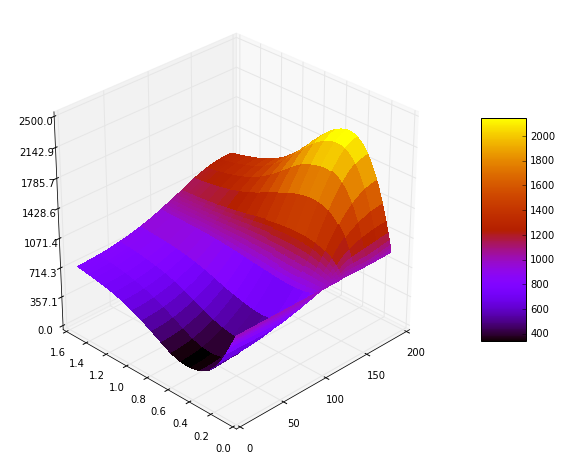

In [4]:
#surface of data from profiles

%matplotlib inline
from numpy import array, ones
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (10,8))
ax = fig.gca(projection='3d')

#must establish points for each timestep
x = array(distance_list[0])
t = time_list
x, t = np.meshgrid(x, t)
z = [];
for i in range(len(time_list)) :
        #x = array(distance_list[i])
        #t = time_list[i] * ones(len(x))
        z.append(elec_conc_list[i])

z = array(z)
surf = ax.plot_surface(x, t, z, rstride=5, cstride=5, cmap = cm.gnuplot, linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(8))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.01f'))
        
        
fig.colorbar(surf, shrink=0.5, aspect=5)   

'''for interactive display
for angle in range(0, 360):
    ax.view_init(30, 225)
    plt.draw()
    '''
ax.view_init(30, 225)
plt.show()


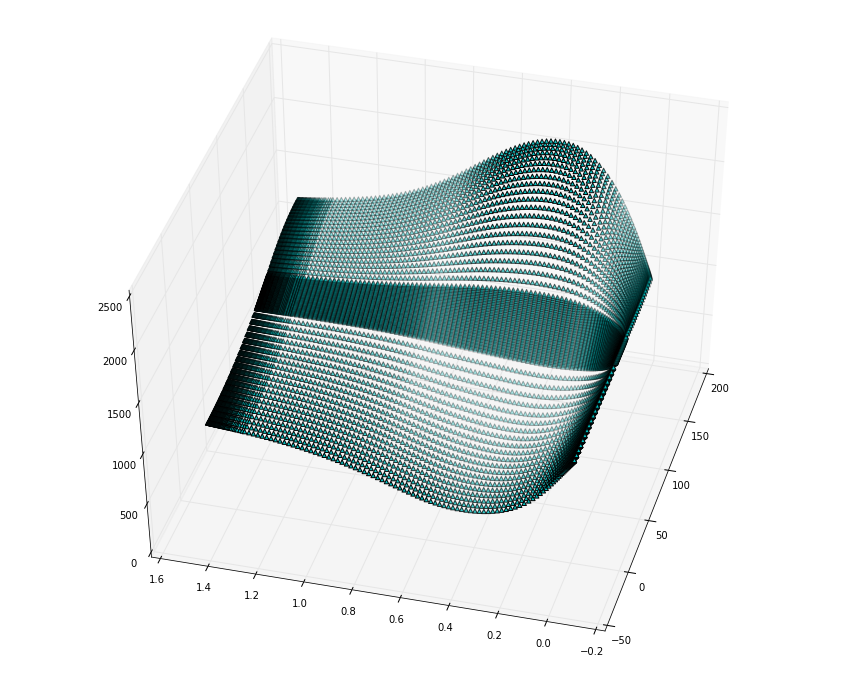

In [5]:
#Scatter using data from profiles

%matplotlib inline
from numpy import array, ones
from matplotlib import cm

fig = plt.figure(figsize=(15, 12))
for i in range(len(time_list)): 
    if i >0:
        x = array(distance_list[i])
        t = time_list[i] * ones(len(x))
        phi_1 = array(elec_conc_list[i])
        ax = fig.gca(projection='3d')
        ax.scatter3D(x, t, phi_1, c='c', marker = '^')       


'''for angle in range(0,360) :       
    ax.view_init(45, 195)
    plt.draw()'''

ax.view_init(45, 195)

plt.show()